<a href="https://colab.research.google.com/github/Rohan300604/lab2/blob/main/unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

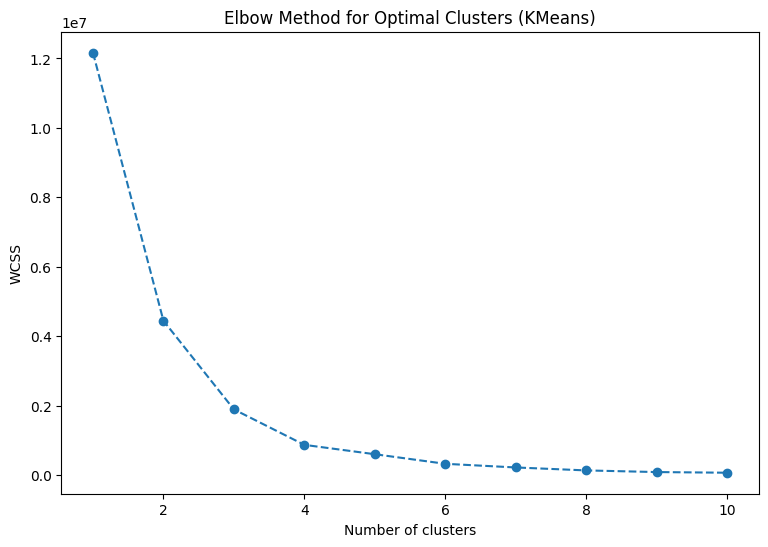

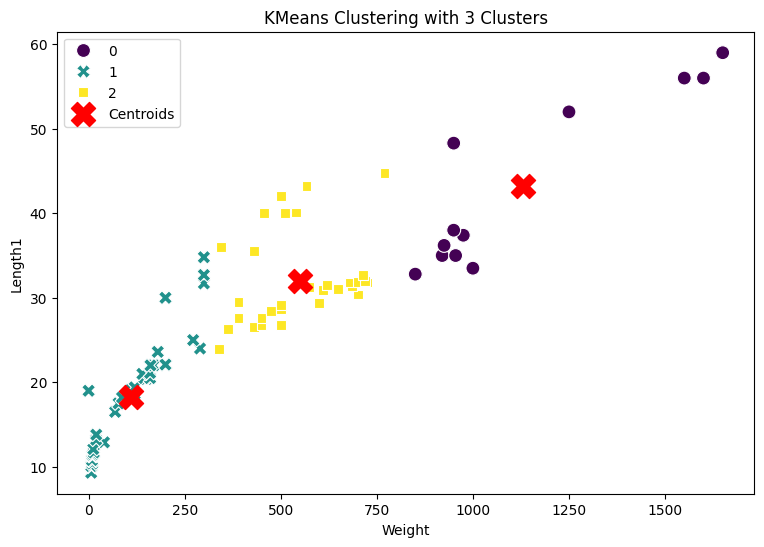

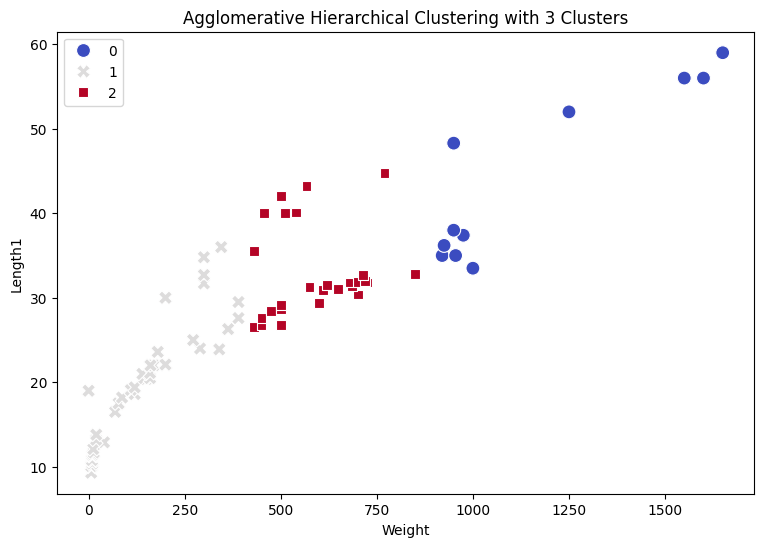

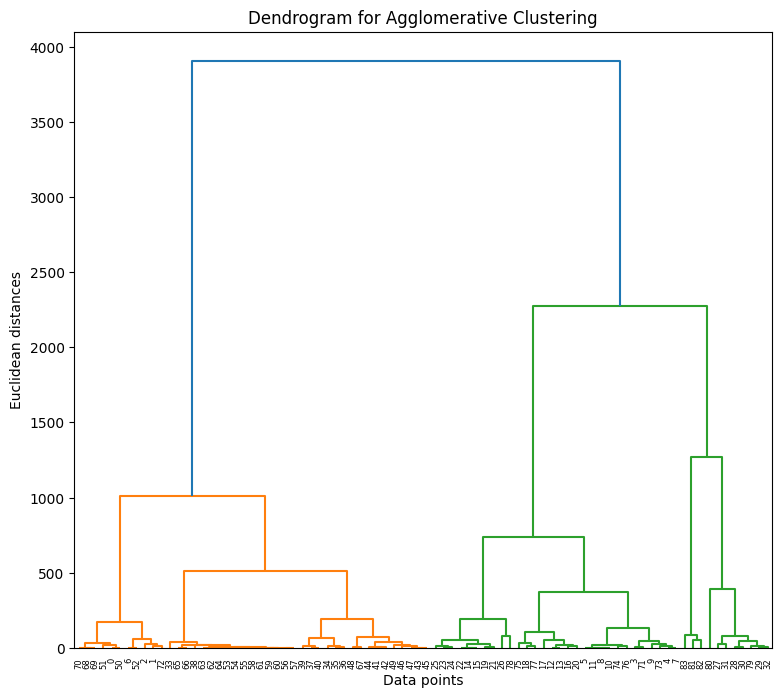

In [4]:
# Import
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

# Load
file_path = '/mnt/data/fish.csv'
fish_data = pd.read_csv("/content/fish.csv")
features = fish_data.iloc[:, [1, 2]].values

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(9, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters (KMeans)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# Applying
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
kmeans_clusters = kmeans.fit_predict(features)

plt.figure(figsize=(9, 6))
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=kmeans_clusters, palette='viridis', style=kmeans_clusters, s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.title('KMeans Clustering with 3 Clusters')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.legend()
plt.show()


hierarchical_clustering = AgglomerativeClustering(n_clusters=optimal_clusters, metric='euclidean', linkage='ward')
hierarchical_clusters = hierarchical_clustering.fit_predict(features)

plt.figure(figsize=(9, 6))
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=hierarchical_clusters, palette='coolwarm', style=hierarchical_clusters, s=100)
plt.title('Agglomerative Hierarchical Clustering with 3 Clusters')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.show()

# Dendrogram
plt.figure(figsize=(9, 8))
dendrogram(linkage(features, method='ward'))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()
